In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils.mea_analysis as mea
import re
import os

In [12]:
vdf = pd.read_csv("example_data/MEA002_postS_50V_V.csv",skiprows=22, sep="\t")
smudf = pd.read_csv("example_data/MEA002_postS_50V_SMU.csv",skiprows=21, sep="\t")
basepath = "example_data/MEA002_postS_50V_SMU.csv"

vdf = vdf.drop(vdf.index[46000:])
smudf = smudf.drop(smudf.index[230:])

In [3]:
smudf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X_Value   230 non-null    float64
 1   Untitled  230 non-null    float64
 2   Comment   0 non-null      float64
dtypes: float64(3)
memory usage: 7.2 KB


In [13]:
vcols = []
for header in list(vdf):
    header = header.replace("Voltage_", "v")
    header = header.replace("Untitled", "current")
    header = header.replace("X_Value", "time")
    vcols.append(header)
vdf.columns = vcols
vdf["trel"] = vdf.time - vdf.time.iloc[0]
vdf.trel = pd.to_numeric(vdf.trel)
vdf = vdf.drop(['Comment'], axis=1)

smucols = []
for header in list(smudf):
    header = header.replace("Untitled", "current")
    header = header.replace("X_Value", "time")
    smucols.append(header)
smudf.columns = smucols
smudf["trel"] = smudf.time - smudf.time.iloc[0]
smudf.trel = pd.to_numeric(smudf.trel)
smudf = smudf.drop(['Comment'], axis=1)

V = False
if not (re.search("(\d+)V", basepath)):
     V = int(re.search("(\d+)mV", basepath).group(1))
elif not (re.search("(\d+)mV", basepath)):
        V = int(re.search("(\d+)V", basepath).group(1))
else:
    print("ERROR:couldnt detect conduction")
    print(basepath)
if V:
    smudf["voltage"] = V
    g0 = 7.75e-5  # quantum conductance
    smudf["conductance"] = smudf.current / smudf.voltage / g0

In [14]:
print(vdf.info())
print(smudf.info())
print(vdf.head())
print(smudf.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23000 entries, 0 to 22999
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    23000 non-null  float64
 1   v0      23000 non-null  float64
 2   v1      23000 non-null  float64
 3   v2      23000 non-null  float64
 4   v3      23000 non-null  float64
 5   v4      23000 non-null  float64
 6   v5      23000 non-null  float64
 7   v6      23000 non-null  float64
 8   v7      23000 non-null  float64
 9   v8      23000 non-null  float64
 10  v9      23000 non-null  float64
 11  v10     23000 non-null  float64
 12  v11     23000 non-null  float64
 13  v12     23000 non-null  float64
 14  v13     23000 non-null  float64
 15  v14     23000 non-null  float64
 16  v15     23000 non-null  float64
 17  trel    23000 non-null  float64
dtypes: float64(18)
memory usage: 3.3 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 0 to 229
Data columns (total 5 columns):
 

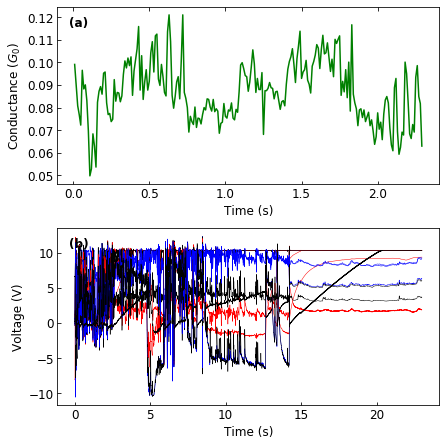

In [5]:
mea.plot_signal(vdf,smudf,show=True)

In [15]:
dg, iei =mea.analyze_events(smudf,gthresh=0.01)

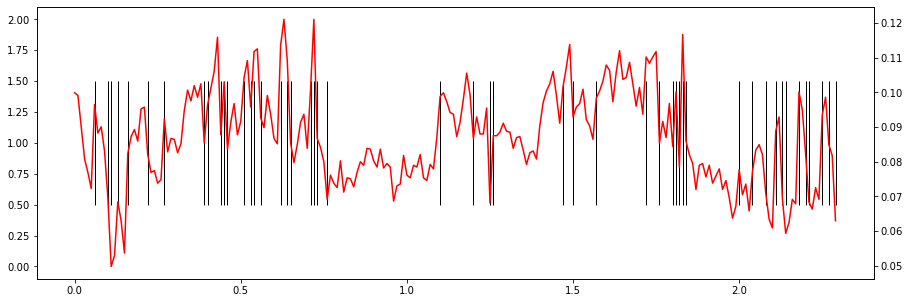

In [16]:
fig, ax = plt.subplots(nrows=1,figsize=(15,5))
ax.eventplot(dg[:,1],linewidth=1,color='k')
ax2=ax.twinx()
ax2.plot(smudf.trel,smudf.conductance,'r')

Text(0.5, 1.0, 'loglog interevent interval length histogram')

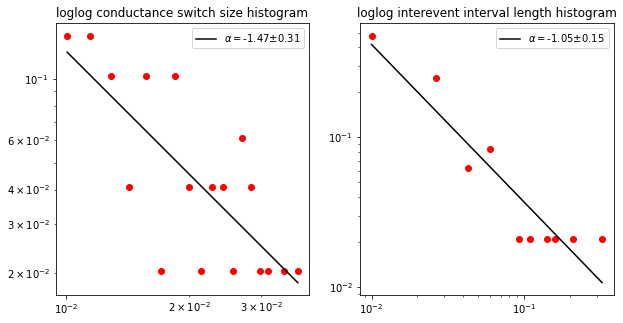

In [17]:
fig, axes = plt.subplots(ncols=2, figsize=(10,5))
mea.plot_loglog(dg[:,0],axes[0])
mea.plot_loglog(iei,axes[1])
axes[0].set_title("loglog conductance switch size histogram")
axes[1].set_title("loglog interevent interval length histogram")

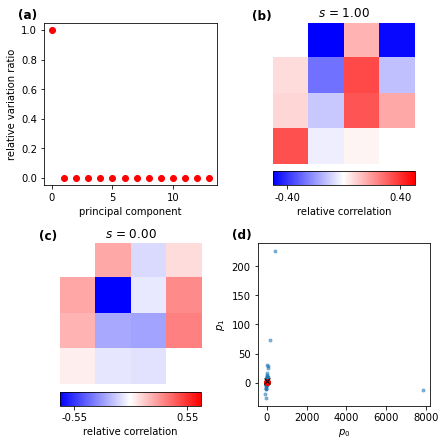

In [19]:
resd = vdf.iloc[:,3:-1].values
starttime = 6000
endtime = 8000
resd = resd[starttime:endtime]
mea.plot_principal_components(resd, displaynan = [], show = True, ends = True)
imgname = os.path.basename(basepath)[:-4]
plt.savefig(f"plots/{imgname}_{starttime/1000:0.0f}-{endtime/1000:0.0f}s.png")

In [38]:
print(vdf.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23000 entries, 0 to 22999
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    23000 non-null  float64
 1   v0      23000 non-null  float64
 2   v1      23000 non-null  float64
 3   v2      23000 non-null  float64
 4   v3      23000 non-null  float64
 5   v4      23000 non-null  float64
 6   v5      23000 non-null  float64
 7   v6      23000 non-null  float64
 8   v7      23000 non-null  float64
 9   v8      23000 non-null  float64
 10  v9      23000 non-null  float64
 11  v10     23000 non-null  float64
 12  v11     23000 non-null  float64
 13  v12     23000 non-null  float64
 14  v13     23000 non-null  float64
 15  v14     23000 non-null  float64
 16  v15     23000 non-null  float64
 17  trel    23000 non-null  float64
dtypes: float64(18)
memory usage: 3.3 MB
None


In [16]:
print(vdf.head())

    time        v0        v1        v2        v3        v4        v5  \
0  0.000  3.375491 -0.252188  0.240782  0.569880 -0.188390 -8.078901   
1  0.001  3.363361 -0.251002  0.227517  0.556639 -0.187310 -8.076416   
2  0.002  3.350614 -0.249758  0.213246  0.542328 -0.186162 -8.073895   
3  0.003  3.338486 -0.248566  0.199379  0.528340 -0.185050 -8.071378   
4  0.004  3.328155 -0.247532  0.187283  0.516036 -0.184073 -8.068906   

         v6        v7        v8        v9       v10       v11       v12  \
0  1.183279 -0.128534 -0.074028 -0.346626  0.633087 -0.085162 -0.318460   
1  1.175985 -0.127735 -0.073874 -0.346540  0.619614 -0.084341 -0.318016   
2  1.168011 -0.126891 -0.073719 -0.346453  0.605088 -0.083467 -0.317565   
3  1.160176 -0.126072 -0.073558 -0.346355  0.590931 -0.082623 -0.317134   
4  1.153283 -0.125349 -0.073395 -0.346241  0.578529 -0.081880 -0.316741   

        v13       v14       v15   trel  
0 -0.289624  0.255032  6.651369  0.000  
1 -0.289558  0.241659  6.636608  0

### Manual PCA exploration

In [ ]:
# This step is VITAL for reasonable PCA. without some form of normalization pca is pretty odd.
resd = np.array([(point - point.mean()) / point.mean() for point in resd])

# from sklearn.decomposition import PCA
pca = PCA()
# resd is an np array where each column is a dimension (voltage channel)
# and each row is a measurement of all dimensions (voltage at a time)
pca.fit(resd)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6.3, 6.3))

# these are the principal component vectors
pc = pca.components_
# adds in empty values to allow 4x4 display of vectors
display_pc = np.insert(pc, displaynan, np.nan, axis=1)

# Plots each of the first 3 principal components
for i in range(1, 3):
    vector = np.insert(display_pc[i - 1], [0, 14], np.nan).reshape((4, 4))
    vrange = np.nanmax(abs(vector))
    im = axes.flat[i].imshow(vector, cmap="bwr", vmax=vrange, vmin=-vrange)
    axes.flat[i].axis("off")
    axes.flat[i].set_title(
        "$s$ = {:0.2f}".format(pca.explained_variance_ratio_[i - 1])
    )
    divider = make_axes_locatable(axes.flat[i])
    cax = divider.append_axes("bottom", size="10%", pad=0.1)
    cb = plt.colorbar(
        im, cax=cax, orientation="horizontal", label="V", format="%.2f"
    )
    cmin = -vrange  # colorbar min value
    cmax = vrange
    span = cmax - cmin

    cb.set_ticks([cmin + (0.1 * span), cmax - (0.1 * span)])
    cb.set_ticklabels(
        ["{:.2f}".format(cmin + (0.1 * span)), "{:.2f}".format(cmax - (0.1 * span))]
    )
    cb.set_label("relative correlation")

# plots the relative variance that is due to each of the pc vectors
axes.flat[0].plot(pca.explained_variance_ratio_, "ro")
axes.flat[0].set_ylabel("relative variation ratio")
axes.flat[0].set_xlabel("principal component")

# projects the observed measurements when projected
# on to the first two principal components by default
plot_pca_projection(
    resd,
    pca.explained_variance_ratio_,
    pca.components_,
    axes.flat[3],
    alpha=alpha,
    ls=ls,
    ends=ends,
)
axes.flat[3].set_ylabel("$p_1$")
axes.flat[3].set_xlabel("$p_0$")

# formatting
for i in range(len(axes.flat)):
    axes.flat[i].text(
        -0.15,
        1.05,
        sublabels[i],
        horizontalalignment="left",
        verticalalignment="center",
        transform=axes.flat[i].transAxes,
        color="k",
        size="large",
        weight="bold",
    )
plt.tight_layout()
if save:
    plt.savefig(save + ".pdf")
    plt.savefig(save + ".png")